In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [4]:
def load_and_pred(file,sizes=224):
    img = tf.io.read_file(file)
    img = tf.image.decode_image(img)
    img = img[:,:,:3]
    img = tf.image.resize(img,size=[sizes,sizes])
    img = img/255
    return img

In [5]:
tf.random.set_seed(42)
train_dir = "dataset/train"
test_dir = "dataset/test"

train_gen= ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255.)

train_data = train_gen.flow_from_directory(directory=train_dir,
    target_size=(224,224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,)

test_data = test_gen.flow_from_directory(directory=test_dir,
    batch_size=32,
    shuffle=True,
    class_mode="categorical",
    target_size=(224,224))

Found 1707 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
        ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
    padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

history = model.fit(train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data))

Epoch 1/5
54/54 [==============================] - 98s 2s/step - loss: 1.9043 - accuracy: 0.3257 - val_loss: 1.3657 - val_accuracy: 0.5600
Epoch 2/5
54/54 [==============================] - 115s 2s/step - loss: 1.0486 - accuracy: 0.6555 - val_loss: 0.9548 - val_accuracy: 0.6400
Epoch 3/5
54/54 [==============================] - 115s 2s/step - loss: 0.6185 - accuracy: 0.8026 - val_loss: 0.8635 - val_accuracy: 0.7000
Epoch 4/5
54/54 [==============================] - 121s 2s/step - loss: 0.2946 - accuracy: 0.9069 - val_loss: 0.8039 - val_accuracy: 0.7600
Epoch 5/5
54/54 [==============================] - 111s 2s/step - loss: 0.1188 - accuracy: 0.9701 - val_loss: 0.8356 - val_accuracy: 0.7800


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

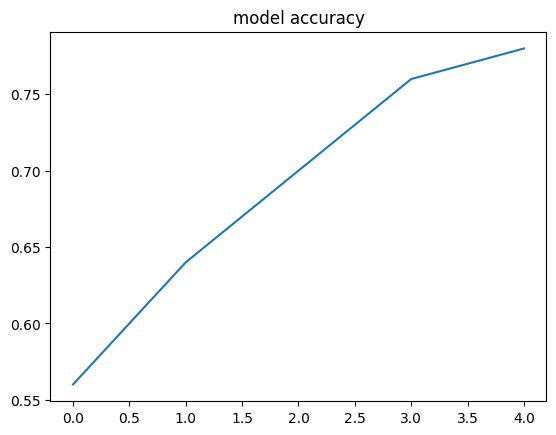

In [8]:
# plot of val accuracy

plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylable('val_accuracy')
plt.xlable('epoch')
plt.legend(['train'] , loc='upper left')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

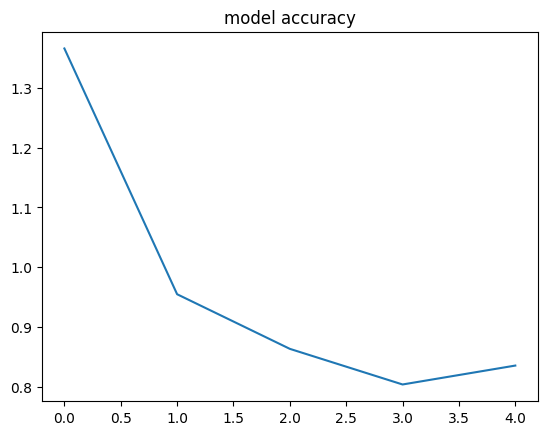

In [9]:

plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylable('val_accuracy')
plt.xlable('epoch')
plt.legend(['train'] , loc='upper left')
plt.show()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   